![display relevant image here](path/url/to/image)
- Banner/header image

# Title
- Relevant to Data and Business Context

## Overview
- BLUF (Bottom Line Up Front)
- One paragraph summary of final model performance and business implications
- Frame your 'story'

## Business Understanding

1. Begin by thoroughly analyzing the business context of FinTech Innovations' loan approval process. Write a short summary that:
- Describes the current manual process and its limitations
- Identifies key stakeholders and their needs
- Explains the implications of different types of model errors
- Justifies your choice between classification and regression approaches

2. Define your modeling goals and success criteria:
- Select appropriate evaluation metrics based on business impact
- You must use at least two different metrics
- Consider creating custom metric
- Establish baseline performance targets
- Document your reasoning for each choice


## Data Understanding
3. Conduct comprehensive exploratory data analysis:
- Describe basic data characteristics
- Examine distributions of all features and target variables
- Investigate relationships between features
- Create visualizations to help aid in EDA
- Document potential data quality issues and their implications

4. Develop feature understanding:
- Categorize features by type (numerical, categorical, ordinal)
- Identify features requiring special preprocessing
- Document missing value patterns and their potential meanings
- Note potential feature engineering opportunities


In [8]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, ConfusionMatrixDisplay

file_path = 'financial_loan_data.csv'
file_path = 'loan.csv'
data = pd.read_csv(file_path)
def generate_financial_csv(filename= "financial_data.csv", n=1000):
    import numpy as np
    import pandas as pd

    np.random.seed(0)
    data = {
        'age': np.random.randint(18, 70, size=n),
        'income': np.random.randint(20000, 150000, size=n),
        'loan_amount': np.random.randint(1000, 50000, size=n),
        'credit_score': np.random.randint(300, 850, size=n),
        'defaulted': np.random.choice([0, 1], size=n, p=[0.8, 0.2])
    }
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)

--- Initial Data Shape and Info ---
Rows: 20000, Columns: 36

--- Column Types and Missing Values ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null 

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0



--- Summary Statistics (Numerical Features) ---


,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


Loan Approved Rate Distribution:
LoanApproved
0    76.1
1    23.9
Name: proportion, dtype: float64


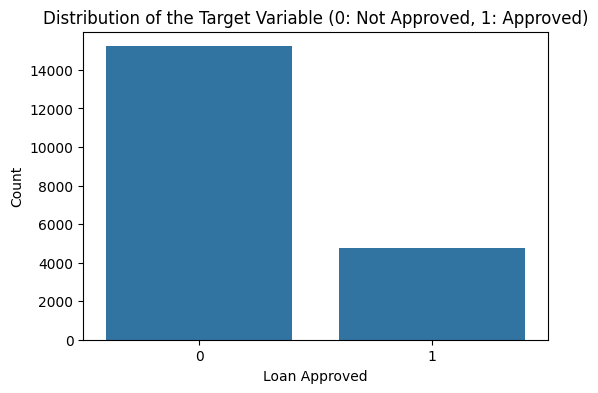

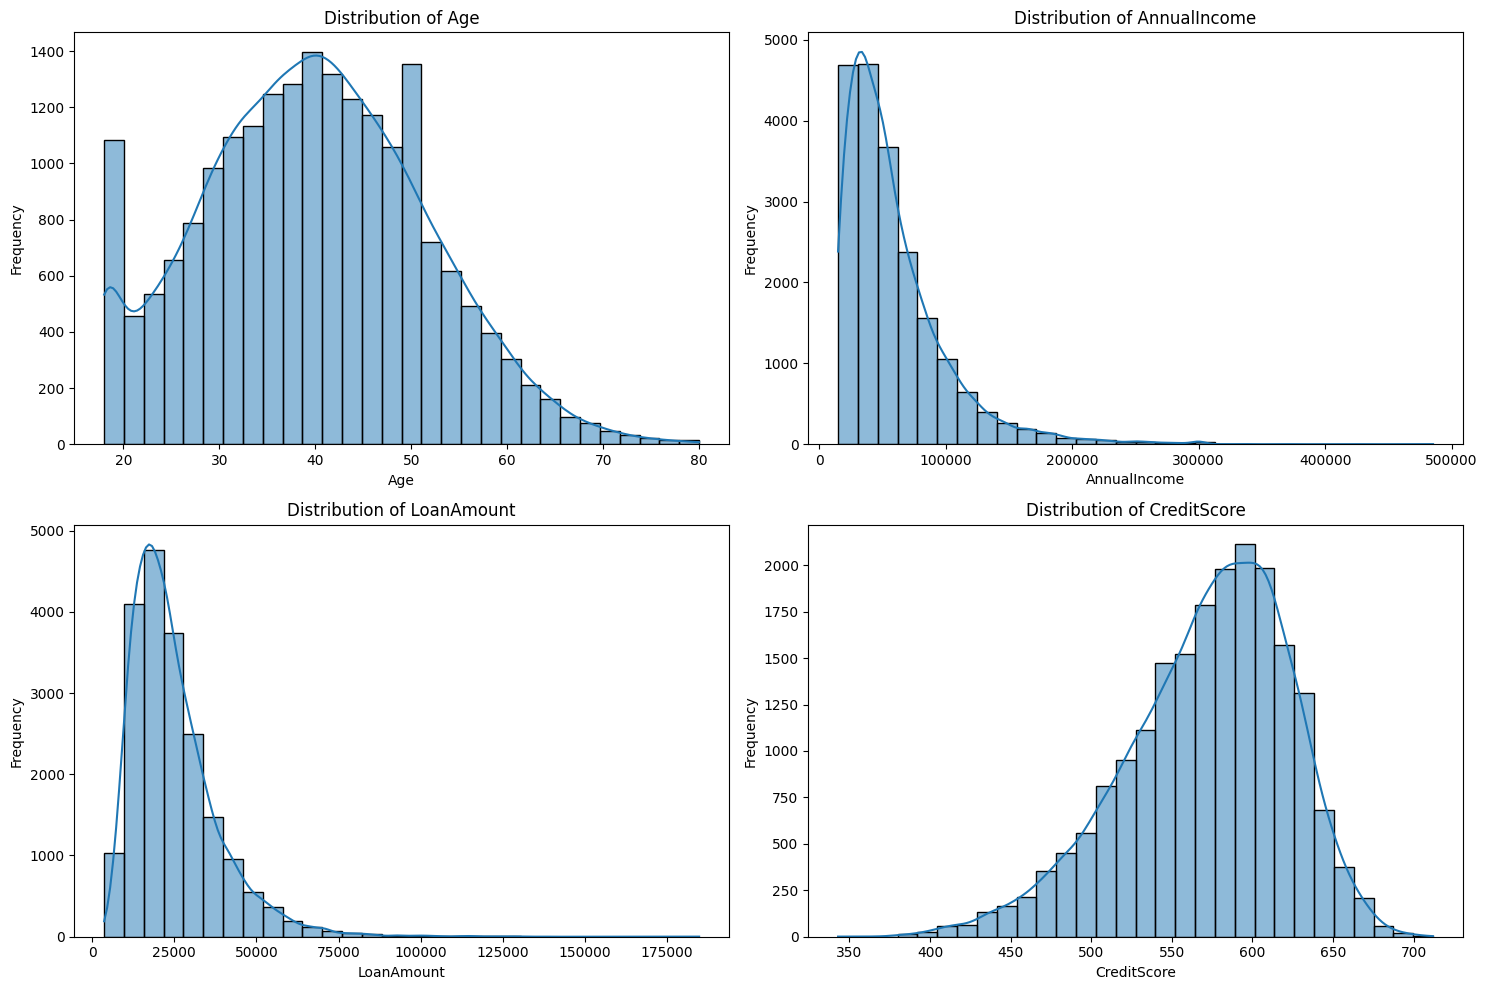

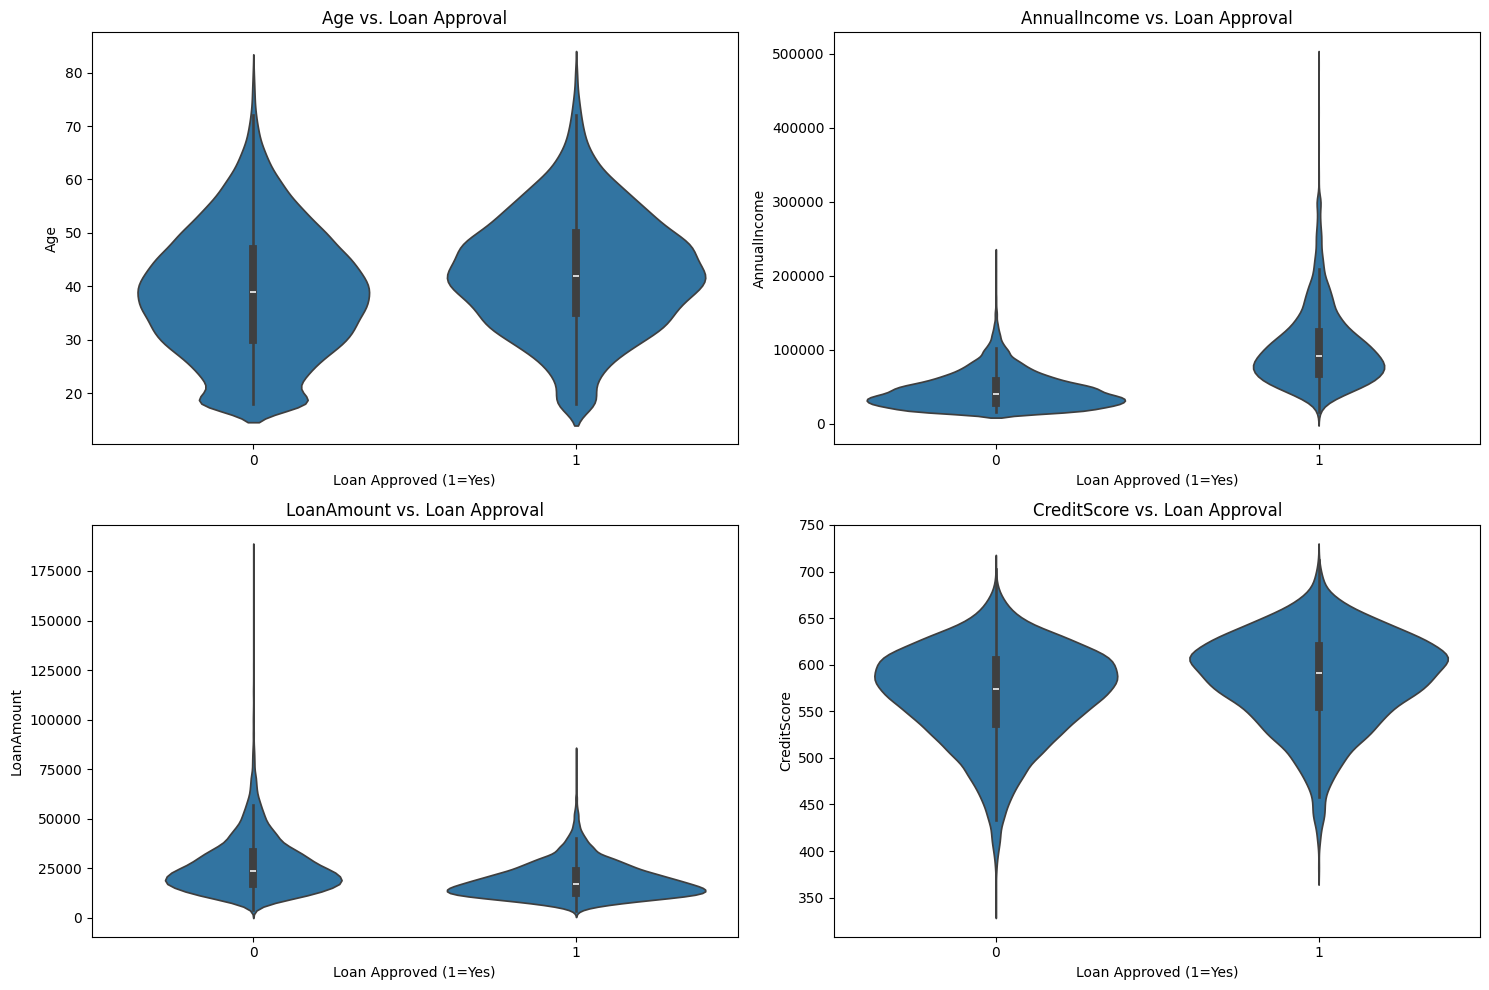

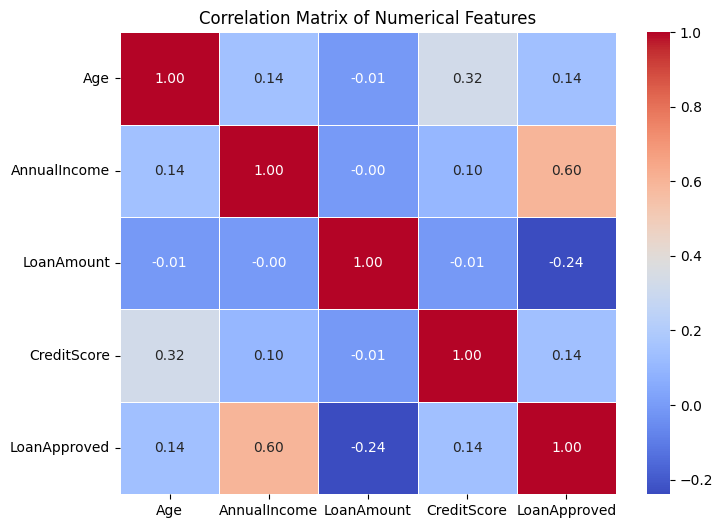

--- Checking for Missing Values ---
Series([], dtype: int64)


In [10]:
# EDA Code Here - Create New Cells As Needed
print("--- Initial Data Shape and Info ---")
print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")
print("\n--- Column Types and Missing Values ---")
data.info()

print("\n--- First 5 Rows of Data ---")
display(data.head())

print("\n--- Summary Statistics (Numerical Features) ---")
display(data.describe())

# Use the actual target column in this dataset: 'LoanApproved'
plt.figure(figsize=(6, 4))
sns.countplot(x='LoanApproved', data=data)
plt.title('Distribution of the Target Variable (0: Not Approved, 1: Approved)')
plt.xlabel('Loan Approved')
plt.ylabel('Count')
loan_approved_rate = data['LoanApproved'].value_counts(normalize=True) * 100
print("Loan Approved Rate Distribution:")
print(loan_approved_rate)

# Use actual numeric column names present in the dataframe
numerical_features = ['Age', 'AnnualIncome', 'LoanAmount', 'CreditScore']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.violinplot(x='LoanApproved', y=feature, data=data)
    plt.title(f'{feature} vs. Loan Approval')
    plt.xlabel('Loan Approved (1=Yes)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

cols_for_corr = ['Age', 'AnnualIncome', 'LoanAmount', 'CreditScore', 'LoanApproved']
plt.figure(figsize=(8, 6))
corr_matrix = data[cols_for_corr].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

print("--- Checking for Missing Values ---")
missing_values = data.isnull().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0])

## Data Preparation
5. Design your preprocessing strategy:
- Create separate preprocessing flows for different feature types
- Must utilize ColumnTransformer and Pipeline
- Consider using FeatureUnion as well
- Handle missing values appropriately for each feature
- Handle Categorical and Ordinal data appropriately
- Scale numeric values if model requires it (linear model)
- Document your reasoning for each preprocessing decision



In [14]:
# Data Prep Code Here - Create New Cells As Needed
# Use column names that match the loaded DataFrame (case-sensitive)
numerical_features = ['Age', 'AnnualIncome', 'LoanAmount', 'CreditScore']
categorical_features = [] 

# Select features and target that exist in `data`
X = data[numerical_features + categorical_features]
y = data['LoanApproved']  # use the actual target column present in the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        # ('cat', categorical_transformer, categorical_features) # Uncomment and add cat transformer if you add categorical features
    ],
    remainder='passthrough' # Keep any columns not explicitly handled (none in this case)
)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Data successfully preprocessed and scaled.")
print(f"Processed training data shape: {X_train_processed.shape}")
print(f"Processed testing data shape: {X_test_processed.shape}")

Training set shape: (16000, 4)
Testing set shape: (4000, 4)
Data successfully preprocessed and scaled.
Processed training data shape: (16000, 4)
Processed testing data shape: (4000, 4)


## Modeling
6. Implement your modeling approach:
- Choose appropriate model algorithms based on your problem definition
- Set up validation strategy with chosen metrics
- Use a train test split and cross validation
- Create complete pipeline including any preprocessing and model
- Document your reasoning for each modeling decision

7. Optimize your model:
- Define parameter grid based on your understanding of the algorithms
- Implement GridSearchCV and/or RandomizedSearchCV with chosen metrics
- Consider tuning preprocessing steps
- Track and document the impact of different parameter combinations
- Consider the trade-offs between different model configurations

NOTE: Be mindful of time considerations - showcase “how to tune” 


In [20]:
# Code Modeling Here - fixed implementations for training and evaluation

def train_and_evaluate_logistic_regression(X_train, y_train, X_test, y_test):
    """Train and evaluate a logistic regression model on preprocessed arrays."""
    print("--- Training Logistic Regression Model ---")
    model = LogisticRegression(random_state=42, solver='liblinear')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    print("Logistic Regression classification report:")
    print(classification_report(y_test, y_pred))
    return y_pred, y_pred_proba, model

# Train & evaluate logistic regression using the preprocessed arrays
y_pred_lr, y_proba_lr, model_lr = train_and_evaluate_logistic_regression(
    X_train_processed, y_train, X_test_processed, y_test
)

def train_and_evaluate_random_forest(X_train, y_train, X_test, y_test):
    """Train and evaluate a random forest classifier on preprocessed arrays."""
    print("--- Training Random Forest Classifier ---")
    model = RandomForestClassifier(random_state=42, n_estimators=100, criterion='gini')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    print("Random Forest classification report:")
    print(classification_report(y_test, y_pred))
    return y_pred, y_pred_proba, model

# Train & evaluate random forest using the preprocessed arrays
y_pred_rf, y_proba_rf, model_rf = train_and_evaluate_random_forest(
    X_train_processed, y_train, X_test_processed, y_test
)

# Full pipeline that includes the preprocessor (works with DataFrame inputs)
full_pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, solver='liblinear'))
])

# Fit the pipeline using the original DataFrame inputs (preprocessor will handle them)
full_pipeline_lr.fit(X_train, y_train)
y_pred_full_lr = full_pipeline_lr.predict(X_test)

print("\nFull Logistic Regression pipeline created and trained successfully.")
print(f"Full Pipeline Test Accuracy: {full_pipeline_lr.score(X_test, y_test):.4f}")

--- Training Logistic Regression Model ---
Logistic Regression classification report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.92      3044
           1       0.82      0.64      0.72       956

    accuracy                           0.88      4000
   macro avg       0.86      0.80      0.82      4000
weighted avg       0.88      0.88      0.88      4000

--- Training Random Forest Classifier ---
Random Forest classification report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      3044
           1       0.78      0.67      0.72       956

    accuracy                           0.88      4000
   macro avg       0.84      0.80      0.82      4000
weighted avg       0.87      0.88      0.87      4000


Full Logistic Regression pipeline created and trained successfully.
Full Pipeline Test Accuracy: 0.8812


## Evaluation and Conclusion
8. Conduct thorough evaluation of final model:
- Assess models test data performance using your defined metrics
- Analyze performance across different data segments
- Identify potential biases or limitations
- Visualize model performance
    - Classification: Confusion Matrix/ROC-AUC
    - Regression: Scatter Plot (Predicted vs. Actual values)

9. Extract and interpret feature importance/significance:
- Which features had the most impact on your model?
- Does this lead to any potential business recommendations?

10. Prepare your final deliverable:
- Technical notebook with complete analysis
- Executive summary for business stakeholders
- Recommendations for implementation
- Documentation of potential improvements

## Data Preparation
5. Design your preprocessing strategy:
- Create separate preprocessing flows for different feature types
- Must utilize ColumnTransformer and Pipeline
- Consider using FeatureUnion as well
- Handle missing values appropriately for each feature
- Handle Categorical and Ordinal data appropriately
- Scale numeric values if model requires it (linear model)
- Document your reasoning for each preprocessing decision

